In [2]:
import sys
import warnings
warnings.filterwarnings('ignore')
import glob
!{sys.executable} -m pip install numpy pandas matplotlib scikit-learn pyarrow seaborn imblearn xgboost| grep -v 'already satisfied'

#

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.2/24.2 MB 15.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 17.8 MB/s eta 0:00:00


In [3]:
df = pd.read_csv("data/train.csv")

In [4]:
df.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   int64  
 2   Drug           7905 non-null   object 
 3   Age            7905 non-null   int64  
 4   Sex            7905 non-null   object 
 5   Ascites        7905 non-null   object 
 6   Hepatomegaly   7905 non-null   object 
 7   Spiders        7905 non-null   object 
 8   Edema          7905 non-null   object 
 9   Bilirubin      7905 non-null   float64
 10  Cholesterol    7905 non-null   float64
 11  Albumin        7905 non-null   float64
 12  Copper         7905 non-null   float64
 13  Alk_Phos       7905 non-null   float64
 14  SGOT           7905 non-null   float64
 15  Tryglicerides  7905 non-null   float64
 16  Platelets      7905 non-null   float64
 17  Prothrombin    7905 non-null   float64
 18  Stage   

<Axes: >

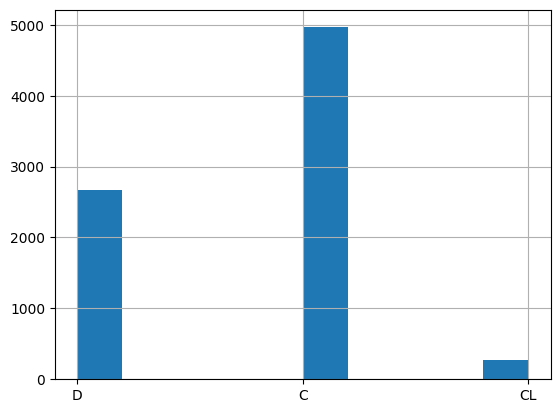

In [6]:
df["Status"].hist()

In [7]:
# unbalanced init!

In [8]:
df.describe()

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000
mean,3952.000000,2030.173308,18373.146490,2.594485,350.561923,3.548323,83.902846,1816.745250,114.604602,115.340164,265.228969,10.629462,3.032511
std,2282.121272,1094.233744,3679.958739,3.812960,195.379344,0.346171,75.899266,1903.750657,48.790945,52.530402,87.465579,0.781735,0.866511
min,0.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1976.000000,1230.000000,15574.000000,0.700000,248.000000,3.350000,39.000000,834.000000,75.950000,84.000000,211.000000,10.000000,2.000000
50%,3952.000000,1831.000000,18713.000000,1.100000,298.000000,3.580000,63.000000,1181.000000,108.500000,104.000000,265.000000,10.600000,3.000000
75%,5928.000000,2689.000000,20684.000000,3.000000,390.000000,3.770000,102.000000,1857.000000,137.950000,139.000000,316.000000,11.000000,4.000000
max,7904.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,563.000000,18.000000,4.000000


In [9]:
df.dtypes

id                 int64
N_Days             int64
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
Status            object
dtype: object

In [10]:
NaN_count = df.isna().sum(axis = 0)
NaN_count

id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
dtype: int64

In [11]:
# nothing empty! lez go

In [12]:
df.nunique()

id               7905
N_Days            461
Drug                2
Age               391
Sex                 2
Ascites             2
Hepatomegaly        2
Spiders             2
Edema               3
Bilirubin         111
Cholesterol       226
Albumin           160
Copper            171
Alk_Phos          364
SGOT              206
Tryglicerides     154
Platelets         227
Prothrombin        49
Stage               4
Status              3
dtype: int64

In [13]:
# create train and validation sets that are divided equally

In [14]:
from sklearn.model_selection import train_test_split

train, validation = train_test_split(df, stratify=df["Status"], test_size=0.2)

In [15]:
# Distribution in the train and validation set

Text(0.5, 0.98, 'Distribution of Disruptions in Training and Test Sets')

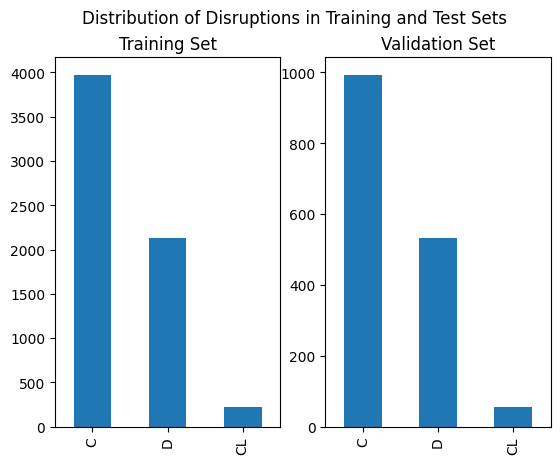

In [16]:
plt.subplot(1,2,1)
#train['Status'].hist()
train["Status"].value_counts().plot(kind="bar")

plt.title("Training Set")

plt.subplot(1,2,2)
#validation["Status"].hist()
validation["Status"].value_counts().plot(kind="bar")

plt.title("Validation Set")

plt.suptitle("Distribution of Disruptions in Training and Test Sets")

In [17]:
#the distribution is similar in training and test set

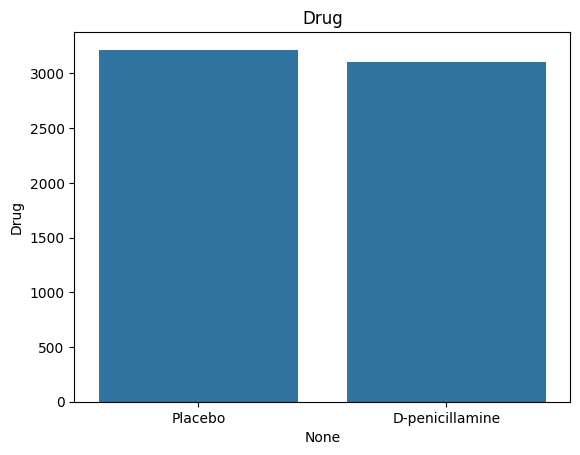

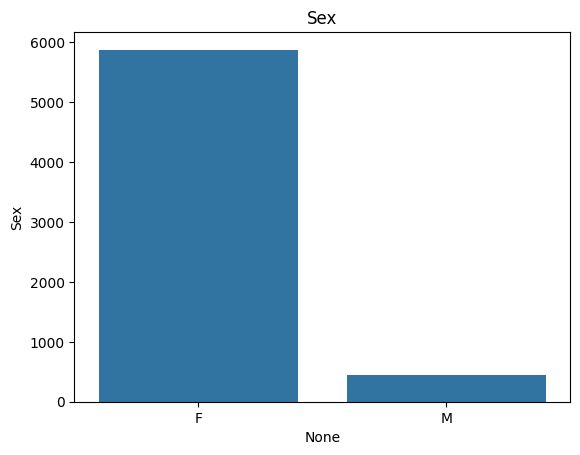

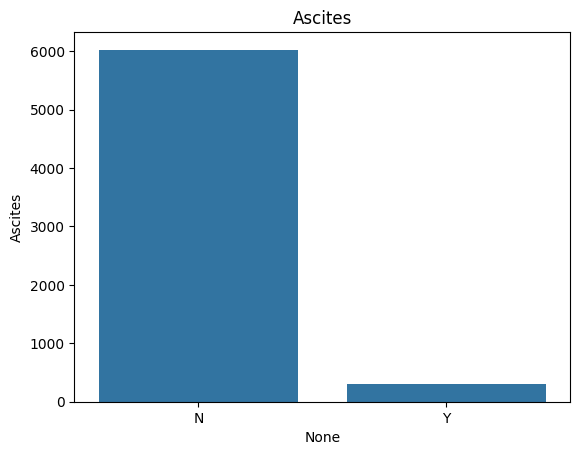

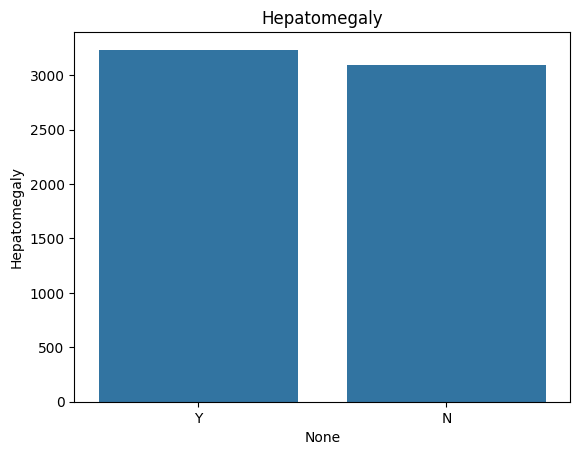

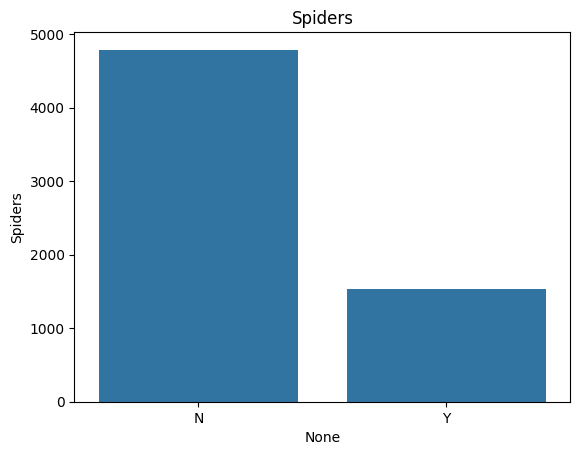

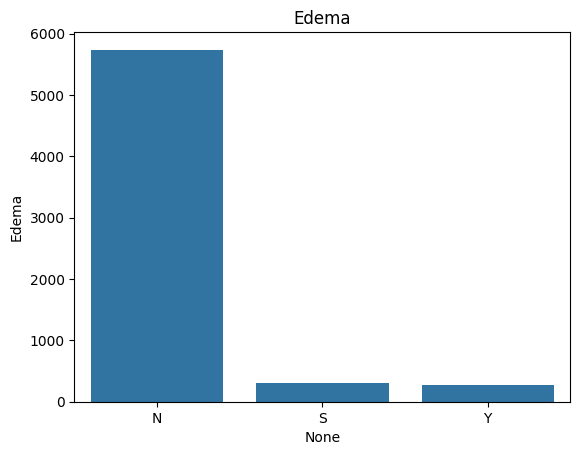

In [18]:
import seaborn as sns

categorical_values = ["Drug","Sex","Ascites","Hepatomegaly","Spiders","Edema"]

for i in categorical_values:
    sns.barplot(x=train[i].value_counts().index,y=train[i].value_counts()).set_title(i)
    plt.show()

In [19]:
# i should have done the stratified split which included sex, ascites, spiders, edema

In [20]:
# Will do it in the next iteration

In [21]:
train.Drug.replace(("Placebo", "D-penicillamine"), (0,1), inplace = True)
train.Sex.replace(("F", "M"), (0,1), inplace = True)
train.Ascites.replace(("N", "Y"), (0,1), inplace = True)
train.Hepatomegaly.replace(("N", "Y"), (0,1), inplace = True)
train.Spiders.replace(("N", "Y"), (0,1), inplace = True)
# train.Edema.replace(("N", "Y", "S"), (0,1,2), inplace = True)

In [22]:
#one hot encode the status and edema

In [23]:
status_dummies = pd.get_dummies(train.Status)
edema_dummies = pd.get_dummies(train.Edema)
train = pd.concat([train, edema_dummies, status_dummies], axis=1)

In [24]:
train.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status,N,S,Y,C,CL,D
3360,3360,2106,1,15730,1,0,0,0,N,0.9,604.0,3.85,105.0,2120.0,128.65,113.0,256.0,10.7,1.0,C,1,0,0,1,0,0
4106,4106,1271,1,15591,0,0,0,0,N,6.4,374.0,3.50,188.0,1044.0,127.00,195.0,344.0,10.8,2.0,CL,1,0,0,0,1,0
15,15,1212,0,15112,0,0,0,0,N,0.7,335.0,3.54,44.0,1345.0,137.95,145.0,244.0,10.6,3.0,C,1,0,0,1,0,0
7727,7727,2255,1,20600,0,0,1,0,N,0.5,248.0,3.02,82.0,663.0,62.00,85.0,227.0,10.9,4.0,C,1,0,0,1,0,0
408,408,2563,0,12839,1,0,0,0,N,1.0,364.0,4.16,43.0,369.0,74.00,93.0,165.0,10.7,3.0,C,1,0,0,1,0,0


In [25]:
train.N.replace((False,True), (0,1), inplace = True)
train.S.replace((False,True), (0,1), inplace = True)
train.Y.replace((False,True), (0,1), inplace = True)
train.C.replace((False,True), (0,1), inplace = True)
train.CL.replace((False,True), (0,1), inplace = True)
train.D.replace((False,True), (0,1), inplace = True)

In [26]:
train = train.drop("Edema",axis = 1)
train = train.drop("Status",axis = 1)

In [27]:
train.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,N,S,Y,C,CL,D
3360,3360,2106,1,15730,1,0,0,0,0.9,604.0,3.85,105.0,2120.0,128.65,113.0,256.0,10.7,1.0,1,0,0,1,0,0
4106,4106,1271,1,15591,0,0,0,0,6.4,374.0,3.50,188.0,1044.0,127.00,195.0,344.0,10.8,2.0,1,0,0,0,1,0
15,15,1212,0,15112,0,0,0,0,0.7,335.0,3.54,44.0,1345.0,137.95,145.0,244.0,10.6,3.0,1,0,0,1,0,0
7727,7727,2255,1,20600,0,0,1,0,0.5,248.0,3.02,82.0,663.0,62.00,85.0,227.0,10.9,4.0,1,0,0,1,0,0
408,408,2563,0,12839,1,0,0,0,1.0,364.0,4.16,43.0,369.0,74.00,93.0,165.0,10.7,3.0,1,0,0,1,0,0


In [28]:
train.dtypes

id                 int64
N_Days             int64
Drug               int64
Age                int64
Sex                int64
Ascites            int64
Hepatomegaly       int64
Spiders            int64
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
N                  uint8
S                  uint8
Y                  uint8
C                  uint8
CL                 uint8
D                  uint8
dtype: object

In [29]:
numeric_values = ["N_Days","Age","Bilirubin","Cholesterol","Albumin","Copper","Alk_Phos","SGOT","Tryglicerides","Platelets","Prothrombin","Stage"]

In [30]:
#visualise corelation matrix

In [31]:
train.corr()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,N,S,Y,C,CL,D
id,1.000000,-0.014436,0.008767,-0.012644,-0.007154,0.004267,0.009156,0.013818,0.003532,-0.004190,-0.022513,0.000245,-0.006800,0.023753,-0.015041,-0.007384,0.009825,-0.004807,0.002645,-0.006134,0.002764,0.003059,0.008452,-0.006404
N_Days,-0.014436,1.000000,-0.016126,-0.101976,-0.072618,-0.255673,-0.284635,-0.205759,-0.345117,-0.143970,0.256346,-0.277040,-0.022018,-0.232719,-0.194853,0.157370,-0.151486,-0.219400,0.235606,-0.092501,-0.237266,0.336149,-0.069741,-0.316644
Drug,0.008767,-0.016126,1.000000,0.090812,0.044186,0.047033,-0.054338,0.010218,-0.034549,0.006950,-0.040871,0.001846,-0.006619,-0.047267,-0.058795,-0.030007,-0.042837,-0.039204,-0.034450,0.009074,0.039435,-0.022549,0.011933,0.018428
Age,-0.012644,-0.101976,0.090812,1.000000,0.099625,0.149867,0.105004,0.051226,0.091418,-0.052282,-0.106175,0.090011,0.023844,-0.034873,0.015019,-0.085168,0.127679,0.117592,-0.129313,0.075620,0.103749,-0.134941,-0.105401,0.178820
Sex,-0.007154,-0.072618,0.044186,0.099625,1.000000,0.036610,0.066293,-0.029018,0.037066,0.024876,-0.014572,0.156390,-0.006209,0.063812,0.067695,-0.041345,0.065700,0.038830,-0.053479,0.070122,0.001519,-0.133163,0.024655,0.126588
Ascites,0.004267,-0.255673,0.047033,0.149867,0.036610,1.000000,0.183909,0.215462,0.368608,-0.048095,-0.321667,0.264271,0.049570,0.104768,0.130409,-0.188514,0.289572,0.166325,-0.531031,0.093120,0.657677,-0.259222,-0.018010,0.272009
Hepatomegaly,0.009156,-0.284635,-0.054338,0.105004,0.066293,0.183909,1.000000,0.324670,0.295101,0.140325,-0.266947,0.266727,0.127114,0.199129,0.156504,-0.194289,0.252507,0.498564,-0.224369,0.137003,0.173838,-0.384345,0.028476,0.381915
Spiders,0.013818,-0.205759,0.010218,0.051226,-0.029018,0.215462,0.324670,1.000000,0.253998,0.046456,-0.227705,0.253424,0.060311,0.132917,0.079009,-0.166758,0.280534,0.282744,-0.254865,0.130982,0.223720,-0.315250,0.025362,0.312480
Bilirubin,0.003532,-0.345117,-0.034549,0.091418,0.037066,0.368608,0.295101,0.253998,1.000000,0.302566,-0.301051,0.439392,0.125790,0.364333,0.316677,-0.081425,0.291682,0.196661,-0.318443,0.132877,0.312319,-0.417638,0.020187,0.419166
Cholesterol,-0.004190,-0.143970,0.006950,-0.052282,0.024876,-0.048095,0.140325,0.046456,0.302566,1.000000,-0.093911,0.179366,0.125357,0.331941,0.275192,0.090851,0.021929,0.045664,0.027546,-0.002375,-0.036731,-0.187962,0.047700,0.173681


<Axes: >

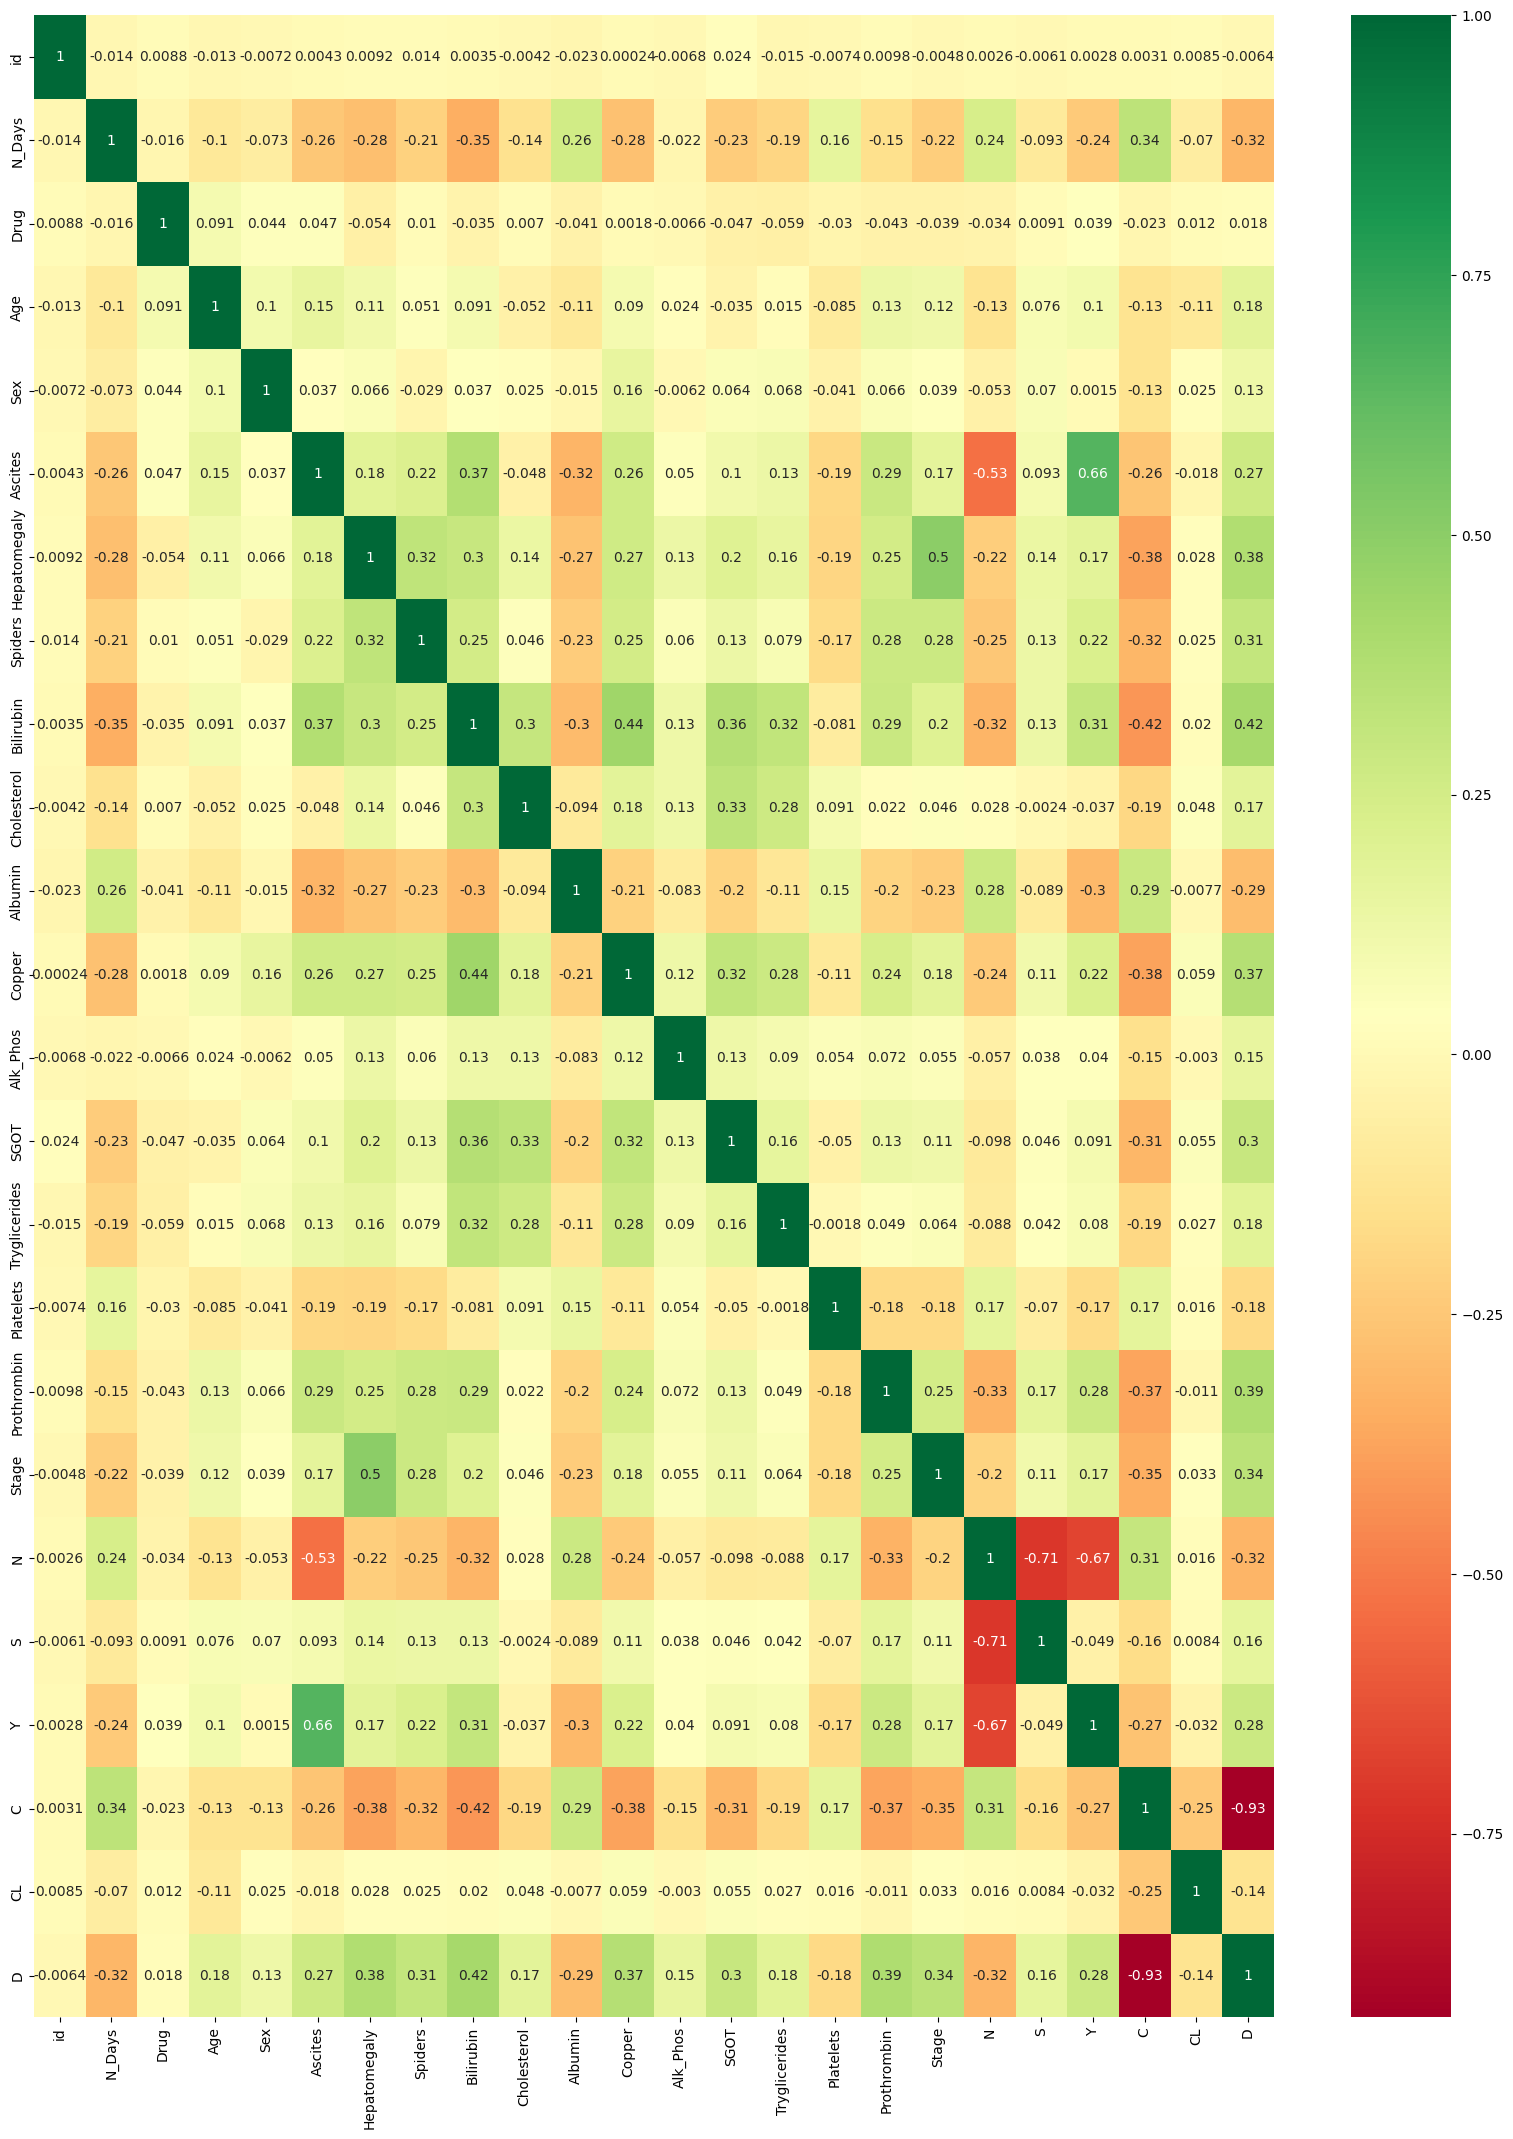

In [32]:
plt.figure(figsize=(20,26))
sns.heatmap(train.corr(), annot=True, cmap="RdYlGn")

In [33]:
features_to_scale = ["N_Days","Age","Bilirubin","Cholesterol","Albumin","Copper","Alk_Phos","SGOT","Tryglicerides","Platelets","Prothrombin","Stage"]

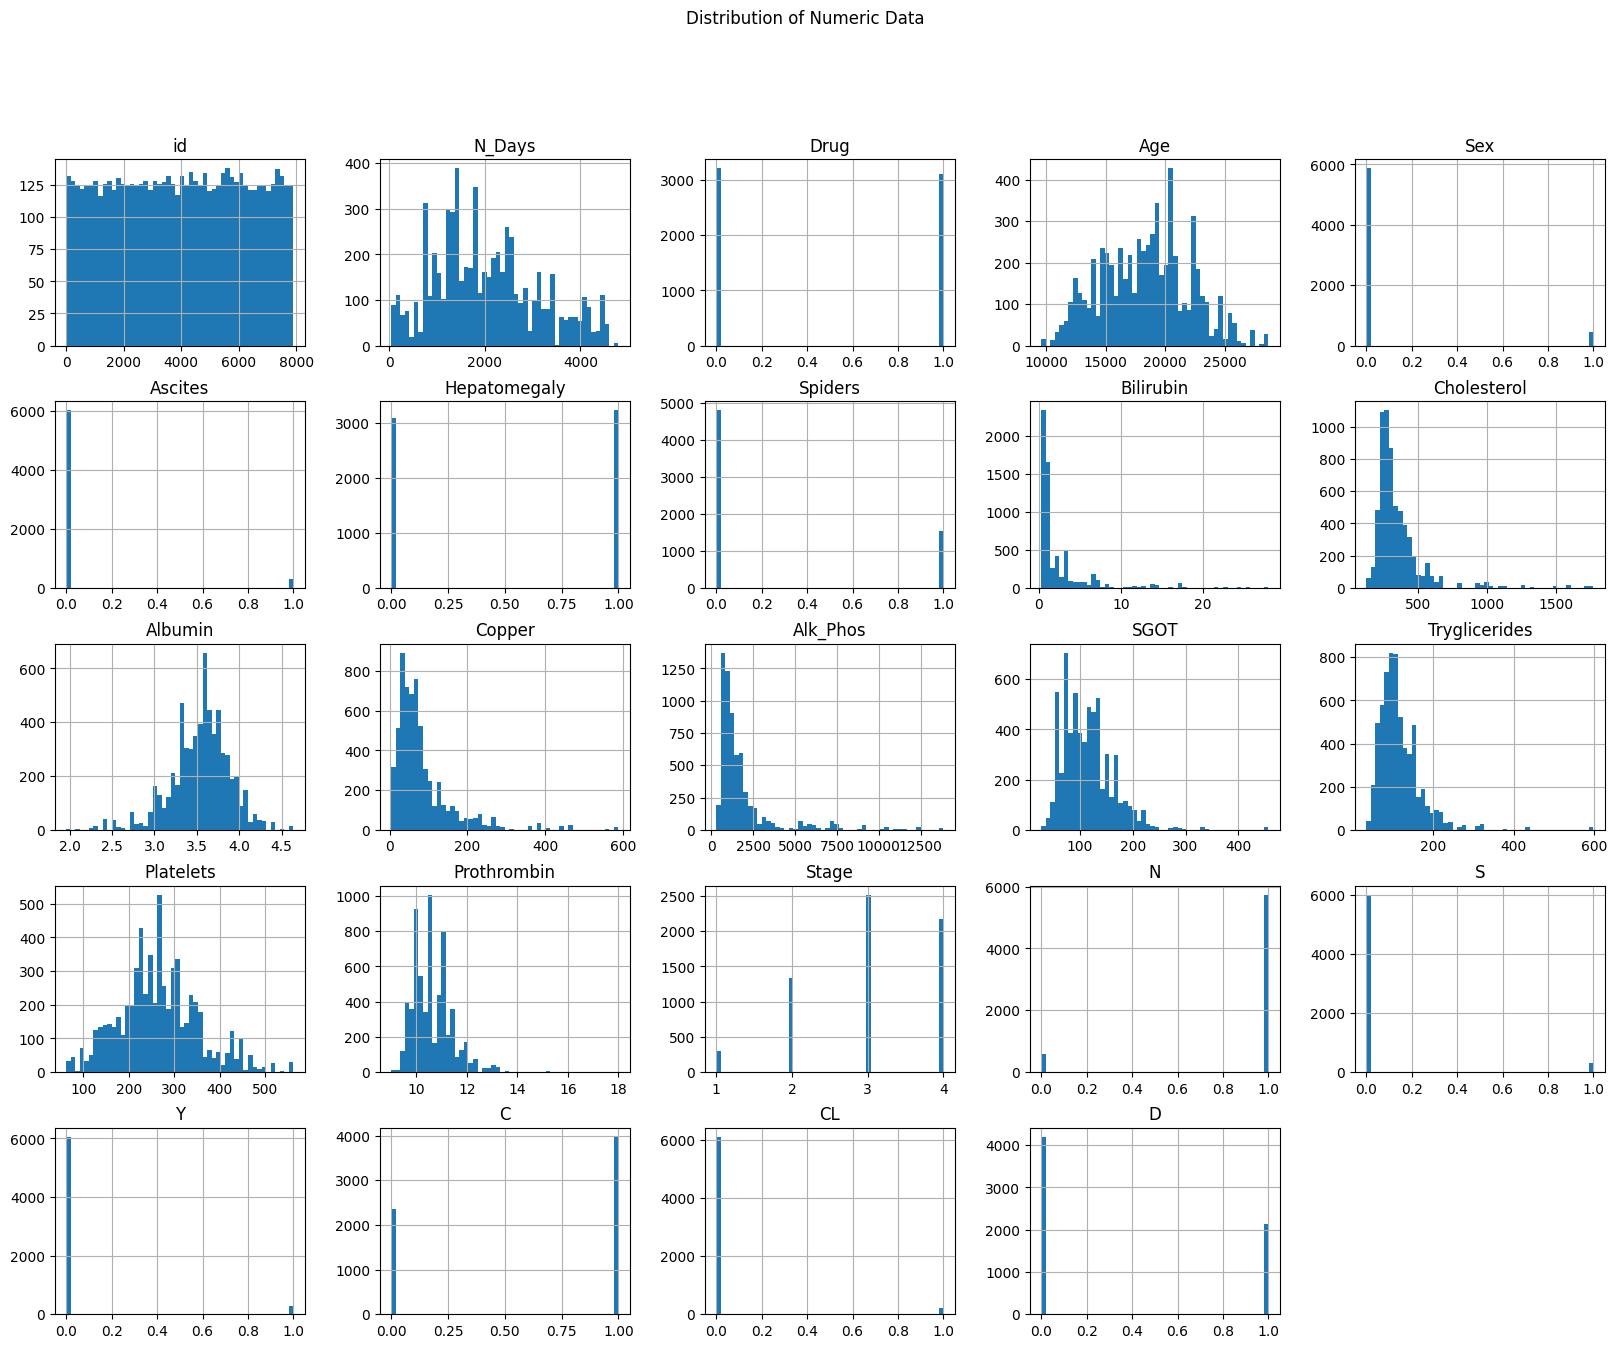

In [34]:
train.hist(bins=50, figsize=(20,15))
plt.suptitle("Distribution of Numeric Data")
plt.show()

In [35]:
#Most of the data here needs to be normalised, mostly right skewed

In [36]:
# lets look at the ones that matter

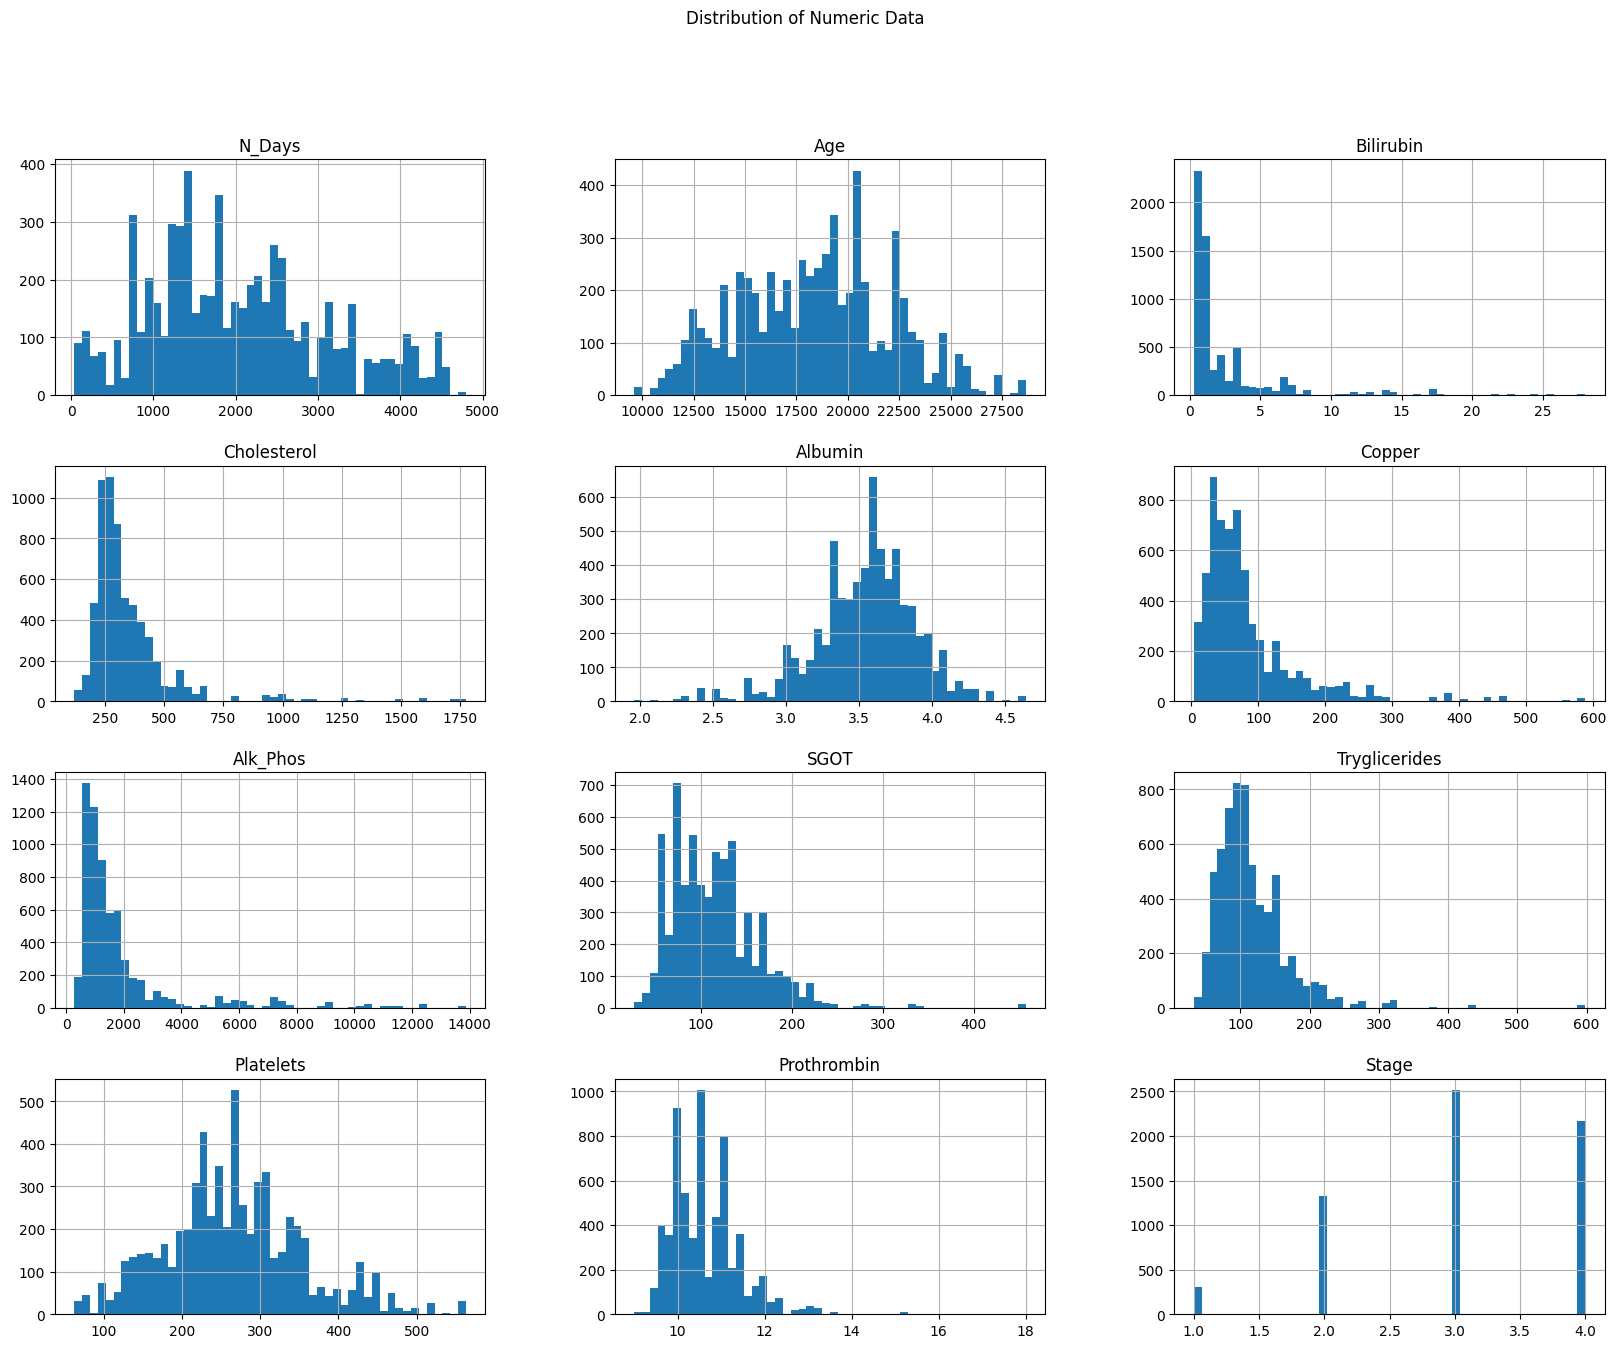

In [37]:
train[features_to_scale].hist(bins=50, figsize=(20,15))
plt.suptitle("Distribution of Numeric Data")
plt.show()

In [38]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer

features_to_scale = ["N_Days","Age","Bilirubin","Cholesterol","Albumin","Copper","Alk_Phos","SGOT","Tryglicerides","Platelets","Prothrombin","Stage"]
# scaler_minmax = MinMaxScaler()
# train[features_to_scale] = scaler_minmax.fit_transform(train[features_to_scale])
transformer = FunctionTransformer(np.log1p)
train[features_to_scale] = transformer.transform(train[features_to_scale])

In [39]:
# viz after scaling

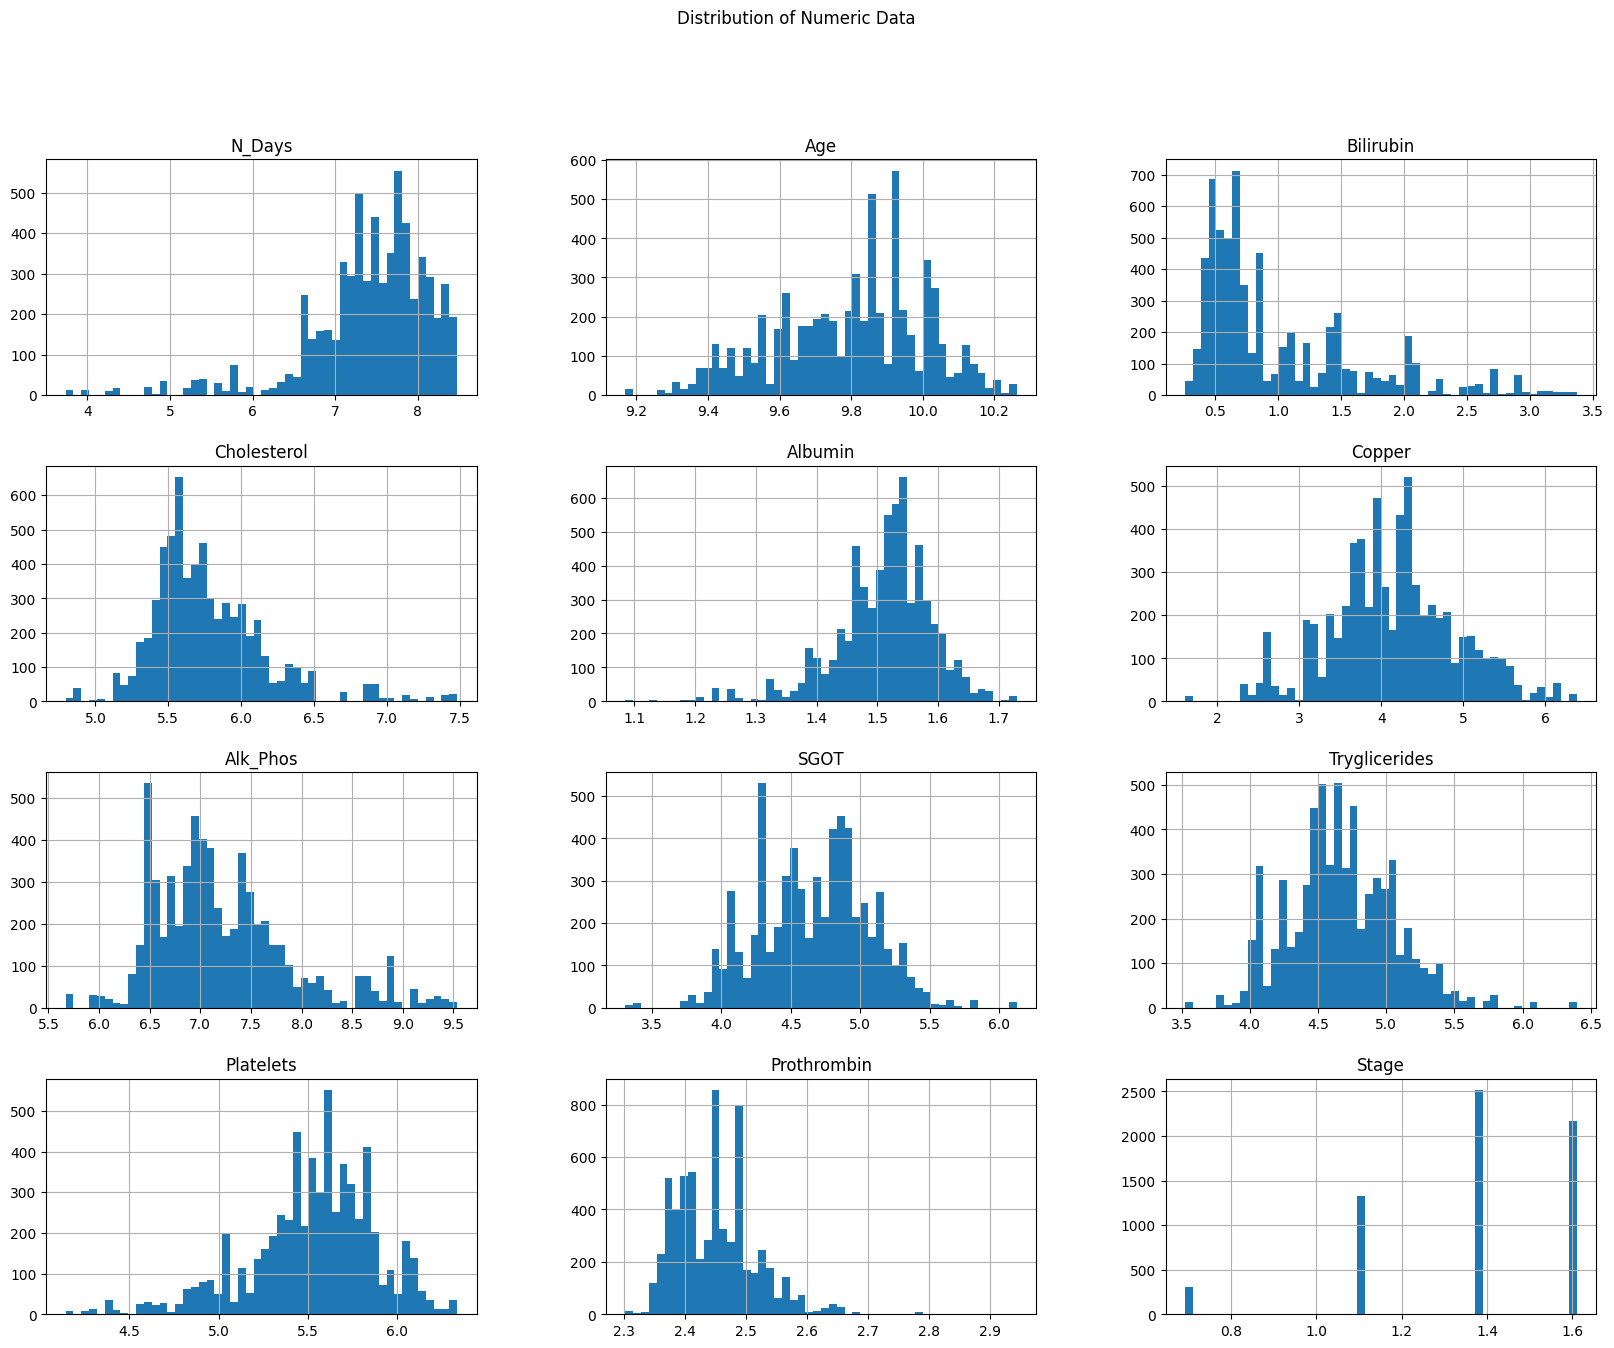

In [40]:
train[features_to_scale].hist(bins=50, figsize=(20,15))
plt.suptitle("Distribution of Numeric Data")
plt.show()

In [41]:
#looks scaled!!! atleast a bit, cause data is on a similar scale

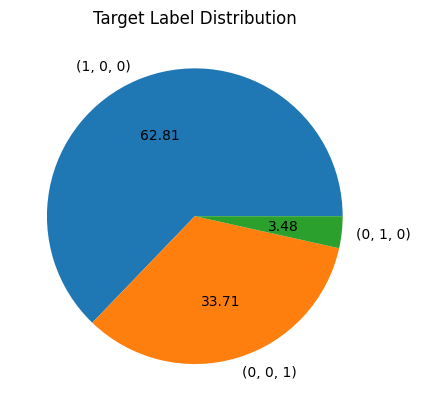

In [42]:
ax = train[["C","CL","D"]].value_counts().plot.pie(autopct="%.2f")
_ = ax.set_title("Target Label Distribution")

In [43]:
# looking at the target distribution, it looks like there's a big imbalence....... We need to balance the data ......

In [44]:
# for the next step i presume

In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6324 entries, 3360 to 5075
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             6324 non-null   int64  
 1   N_Days         6324 non-null   float64
 2   Drug           6324 non-null   int64  
 3   Age            6324 non-null   float64
 4   Sex            6324 non-null   int64  
 5   Ascites        6324 non-null   int64  
 6   Hepatomegaly   6324 non-null   int64  
 7   Spiders        6324 non-null   int64  
 8   Bilirubin      6324 non-null   float64
 9   Cholesterol    6324 non-null   float64
 10  Albumin        6324 non-null   float64
 11  Copper         6324 non-null   float64
 12  Alk_Phos       6324 non-null   float64
 13  SGOT           6324 non-null   float64
 14  Tryglicerides  6324 non-null   float64
 15  Platelets      6324 non-null   float64
 16  Prothrombin    6324 non-null   float64
 17  Stage          6324 non-null   float64
 18  N    

In [46]:
#This function randomly deletes attributes
def make_random_nans(df, percent_rows, percent_columns):
    num_rows_to_nan = int(percent_rows * len(df))
    num_columns_to_nan = int(percent_columns * len(df.columns))

    rows_to_nan = np.random.choice(df.index, num_rows_to_nan, replace=False)

    for row in rows_to_nan:
        columns_to_nan = np.random.choice(df.columns, num_columns_to_nan, replace=False)
        df.loc[row, columns_to_nan] = np.nan

In [47]:
# Making 10% of random attributes NaN in 10% of random rows
make_random_nans(train, 0.1, 0.1)

In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6324 entries, 3360 to 5075
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             6277 non-null   float64
 1   N_Days         6275 non-null   float64
 2   Drug           6279 non-null   float64
 3   Age            6266 non-null   float64
 4   Sex            6283 non-null   float64
 5   Ascites        6269 non-null   float64
 6   Hepatomegaly   6266 non-null   float64
 7   Spiders        6273 non-null   float64
 8   Bilirubin      6258 non-null   float64
 9   Cholesterol    6269 non-null   float64
 10  Albumin        6265 non-null   float64
 11  Copper         6272 non-null   float64
 12  Alk_Phos       6273 non-null   float64
 13  SGOT           6268 non-null   float64
 14  Tryglicerides  6286 non-null   float64
 15  Platelets      6271 non-null   float64
 16  Prothrombin    6271 non-null   float64
 17  Stage          6262 non-null   float64
 18  N    

In [49]:
NaN_count = train.isna().sum(axis = 0)
NaN_count

id               47
N_Days           49
Drug             45
Age              58
Sex              41
Ascites          55
Hepatomegaly     58
Spiders          51
Bilirubin        66
Cholesterol      55
Albumin          59
Copper           52
Alk_Phos         51
SGOT             56
Tryglicerides    38
Platelets        53
Prothrombin      53
Stage            62
N                55
S                41
Y                49
C                57
CL               62
D                51
dtype: int64

## KNN imputation 

In [61]:
from sklearn.impute import KNNImputer

In [62]:
# Initialize the KNNImputer
imputer = KNNImputer(n_neighbors=5)

In [63]:
# Fit on the dataset and transform it to impute missing values
KNN_imputed_data = imputer.fit_transform(train)

In [64]:
# Convert the imputed data back to a pandas DataFrame (optional, for convenience)
KNN_imputed_df = pd.DataFrame(KNN_imputed_data, columns=train.columns)

In [65]:
NaN_count = KNN_imputed_df.isna().sum(axis = 0)
NaN_count

id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
N                0
S                0
Y                0
C                0
CL               0
D                0
dtype: int64